In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [71]:
df_l=pd.read_csv(r"G:codes/udacity/project1/airbnb/listings.csv")
#understanding variables involved in the dataset
df_l.info()

df_l.describe()

list(df_l.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


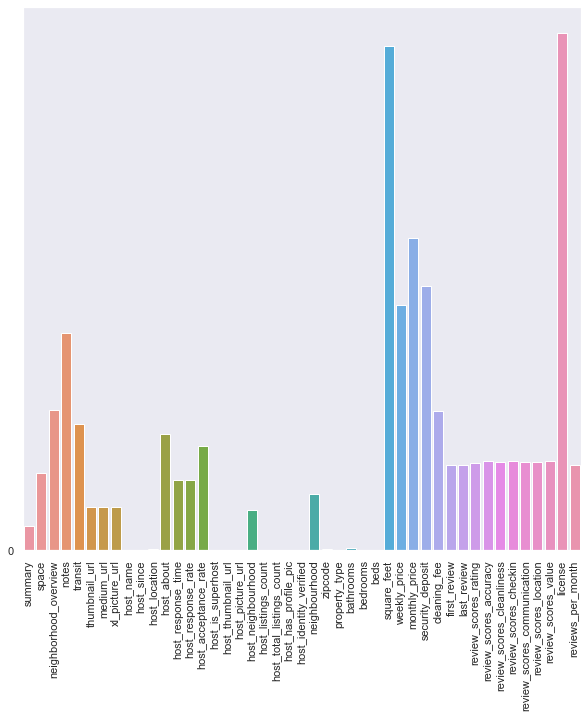

In [72]:
#calculating the missing values and how we can deal with them

df_l_missing=df_l.isnull().sum()/len(df_l) *100

#creating a df with missing values
df_l_missing_values=df_l_missing[df_l_missing > 0]

#plotting a graph will give a better overview of the missing data

#plotting for all missing the values
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))
sns.barplot(x=df_l_missing_values.index,y=df_l_missing_values.values)

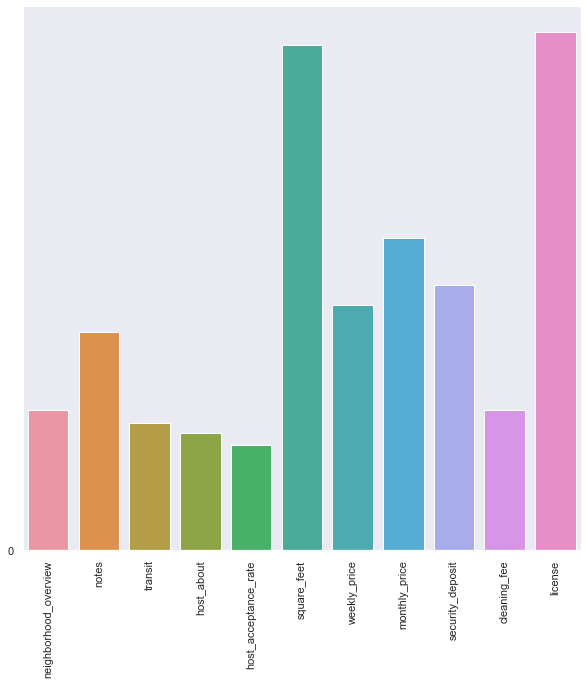

In [73]:
#we can replace the missing values with their respective means, for the data which has almost 20% missing data 
#this won't disrupt the trend 
df_l_missing_final=df_l.isnull().sum()/len(df_l) *100
df_l_missing_values_final=df_l_missing_final[df_l_missing_final > 20]

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))
sns.barplot(x=df_l_missing_values_final.index,y=df_l_missing_values_final.values)

#we can see that there are some variables with more than 50% of missing entries which makes it difficult to process
#further, we can delete those columns for precise prediction 


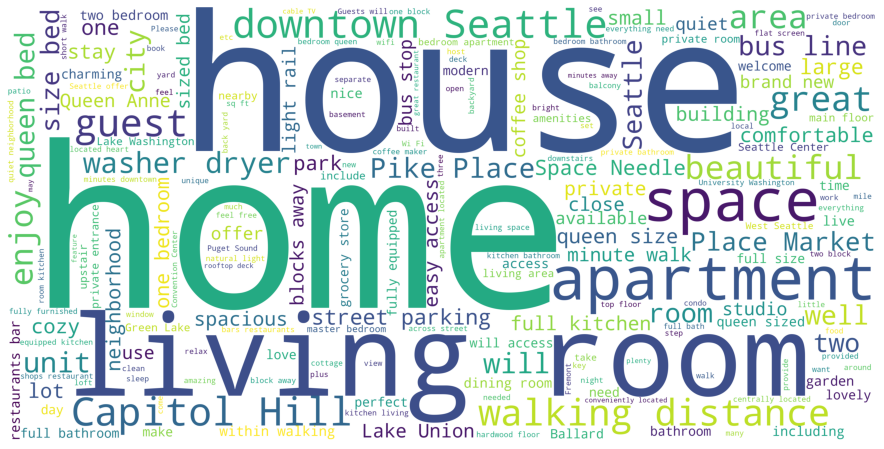

In [74]:
#Creating a wordcloud for description of the houses, it gives us an overview of all the words in the description column
# Creating a simple wordCloud for the column which will give us the gist of all the kind of houses provided
#instead of going through the entire column row by row 
#This gives shows us the most used words in the  

from wordcloud import WordCloud, STOPWORDS

df_l['description'] = df_l['description'].astype('str')
description_WC = ' '.join(df_l['description'])

name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_WC)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()


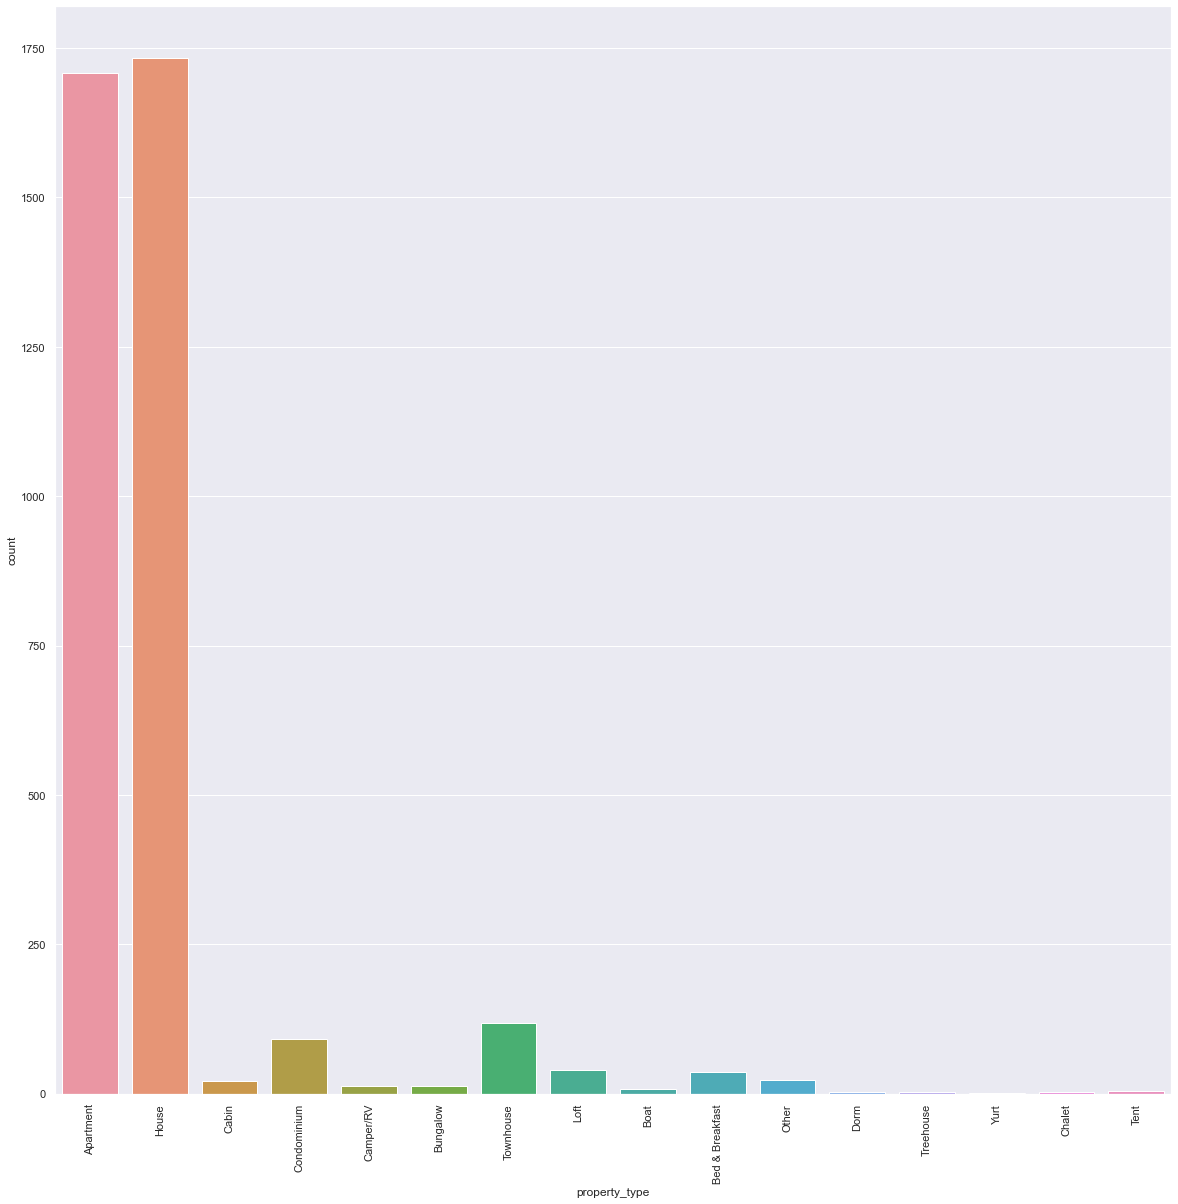

In [75]:
#which property type exists the most which gives us an insight on the number of avaible and most used property types

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(df_l['property_type'])
plt.show()



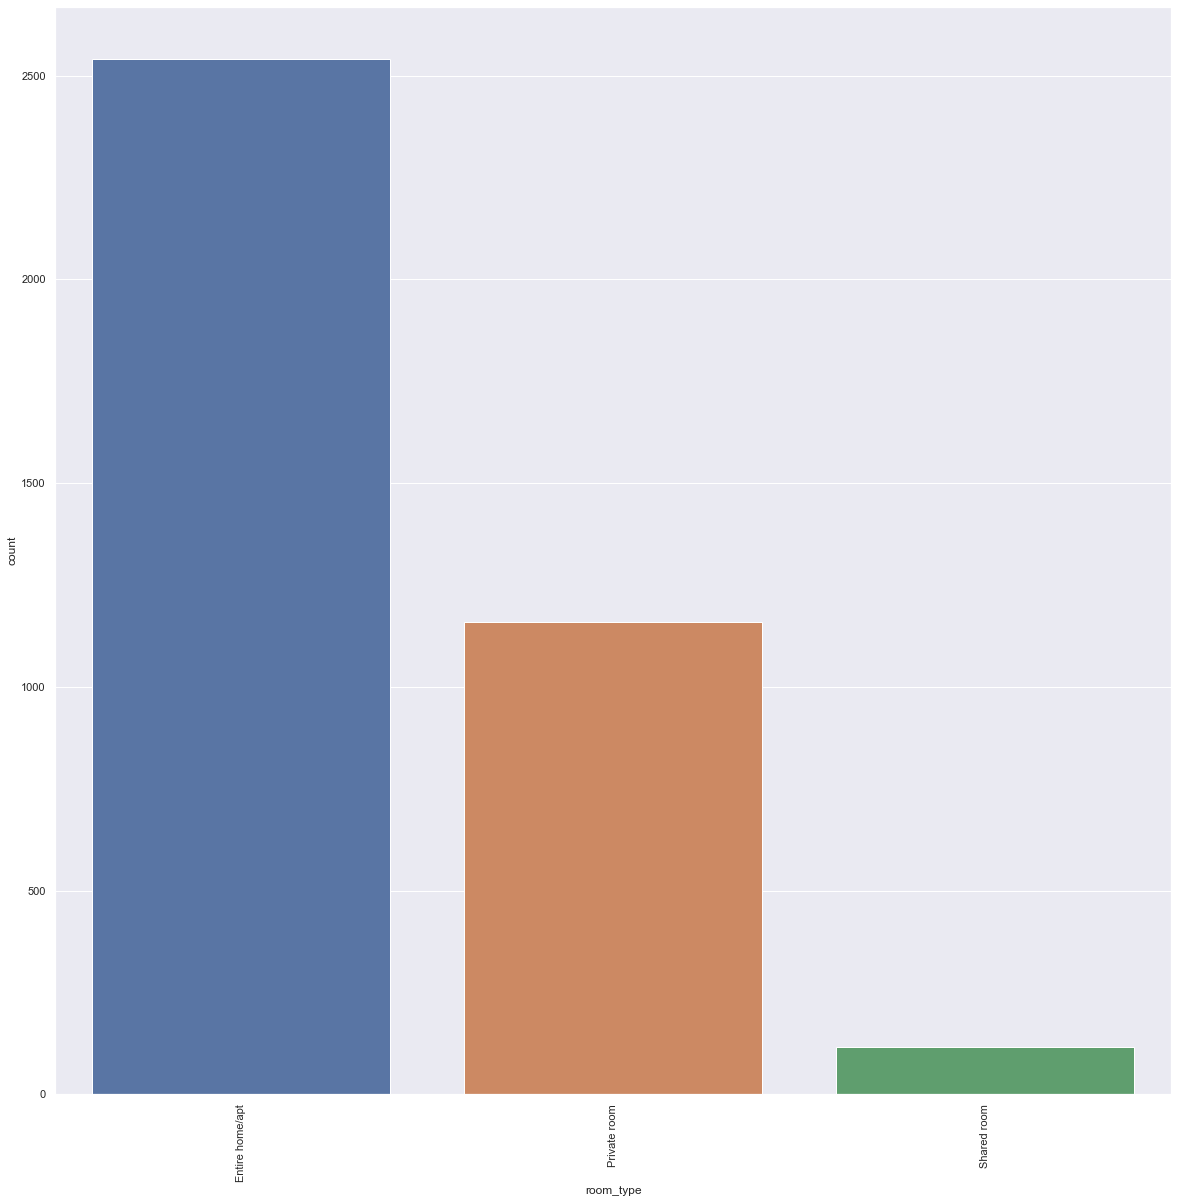

In [76]:
#Room type gives an insight on which room type present and the count of each, tells us more about the property type in the data
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(df_l['room_type'])
plt.show()


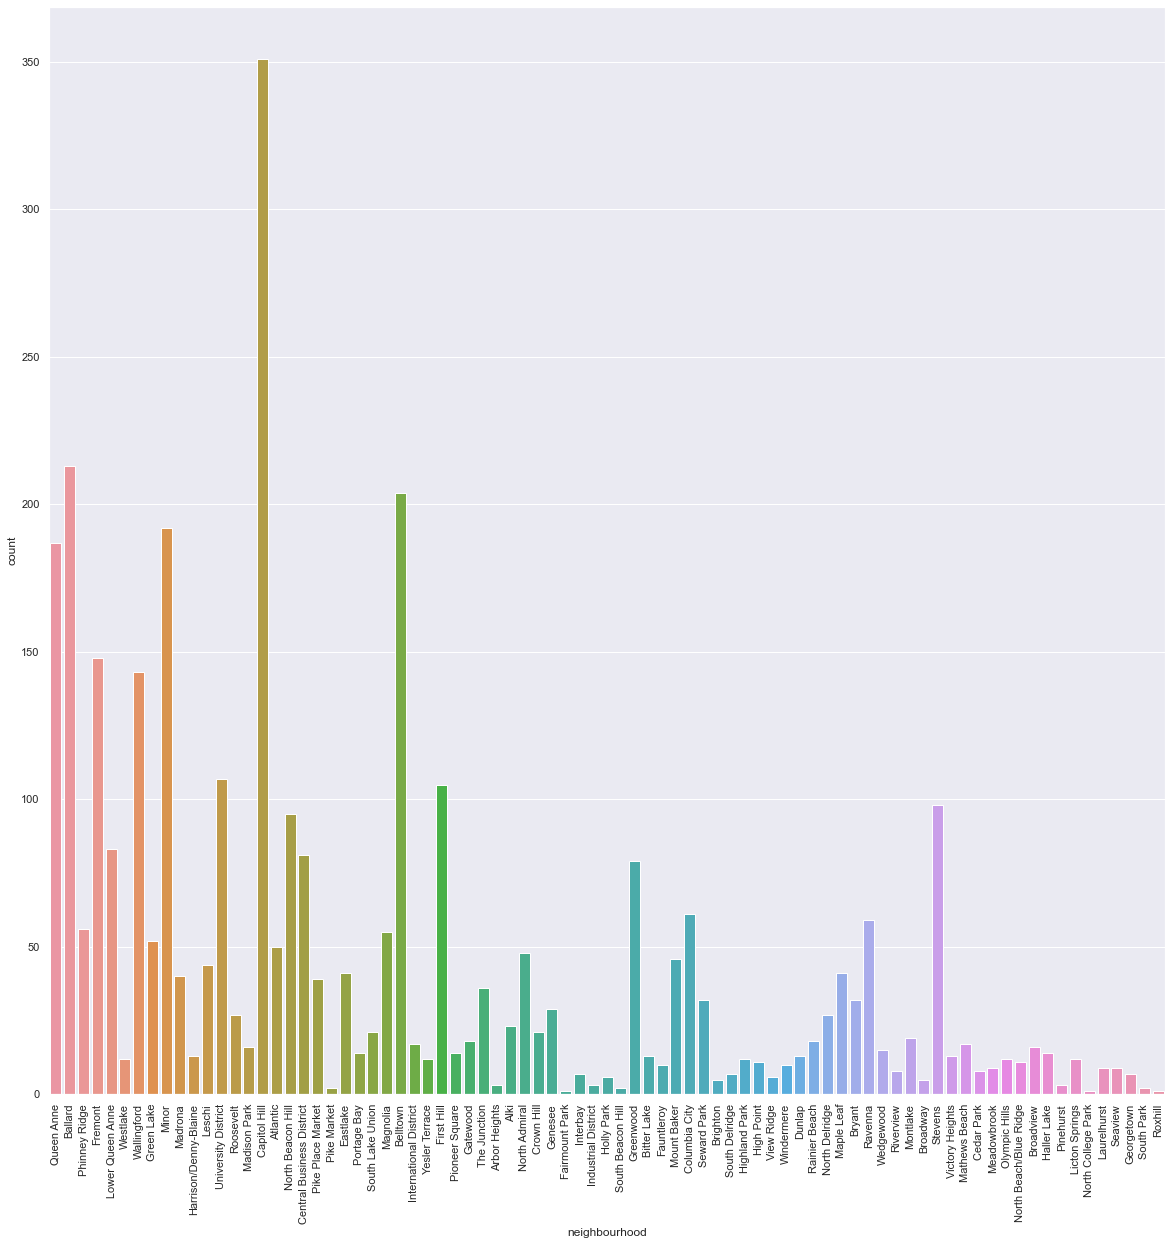

In [77]:
#giving insight on location of the property types  
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(df_l['neighbourhood'])
plt.show()


In [78]:
#since the column price has $ in the start removing that and making it float, making it useful for prediction
df_l['price'] = df_l['price'].str.replace("[$, ]", "").astype("float")

In [79]:
#corelation matrix for all the variables to find the the variables which depend on other variables 
df_l.corr() # Whole correlation matrix

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.546514,-0.023312,-0.023312,-0.016143,0.013360,-0.074279,-0.061821,-0.064113,...,0.039246,0.045355,0.068112,-0.004710,0.003389,0.105444,0.087858,NaN,-0.051348,0.091716
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.546514,NaN,1.000000,-0.069613,-0.069613,-0.024217,0.014749,-0.099620,-0.057076,-0.075722,...,0.027348,0.026768,0.047576,0.022116,0.025023,0.073277,0.078829,NaN,-0.176040,0.106389
host_listings_count,-0.023312,NaN,-0.069613,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
host_total_listings_count,-0.023312,NaN,-0.069613,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,...,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
latitude,-0.016143,NaN,-0.024217,-0.012511,-0.012511,1.000000,-0.155092,0.000335,-0.015003,0.039100,...,-0.038086,-0.015072,-0.038183,-0.018381,-0.025117,0.096746,-0.019488,NaN,0.026750,-0.084988
longitude,0.013360,NaN,0.014749,-0.000055,-0.000055,-0.155092,1.000000,-0.071584,-0.017041,-0.055045,...,-0.047121,-0.037005,-0.062576,-0.046990,-0.061539,-0.190567,-0.043979,NaN,0.086343,0.002583
accommodates,-0.074279,NaN,-0.099620,0.111210,0.111210,0.000335,-0.071584,1.000000,0.538439,0.770974,...,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,NaN,-0.029525,-0.144150
bathrooms,-0.061821,NaN,-0.057076,0.068226,0.068226,-0.015003,-0.017041,0.538439,1.000000,0.610937,...,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,NaN,-0.002731,-0.167894
bedrooms,-0.064113,NaN,-0.075722,0.065931,0.065931,0.039100,-0.055045,0.770974,0.610937,1.000000,...,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,NaN,-0.045543,-0.230287


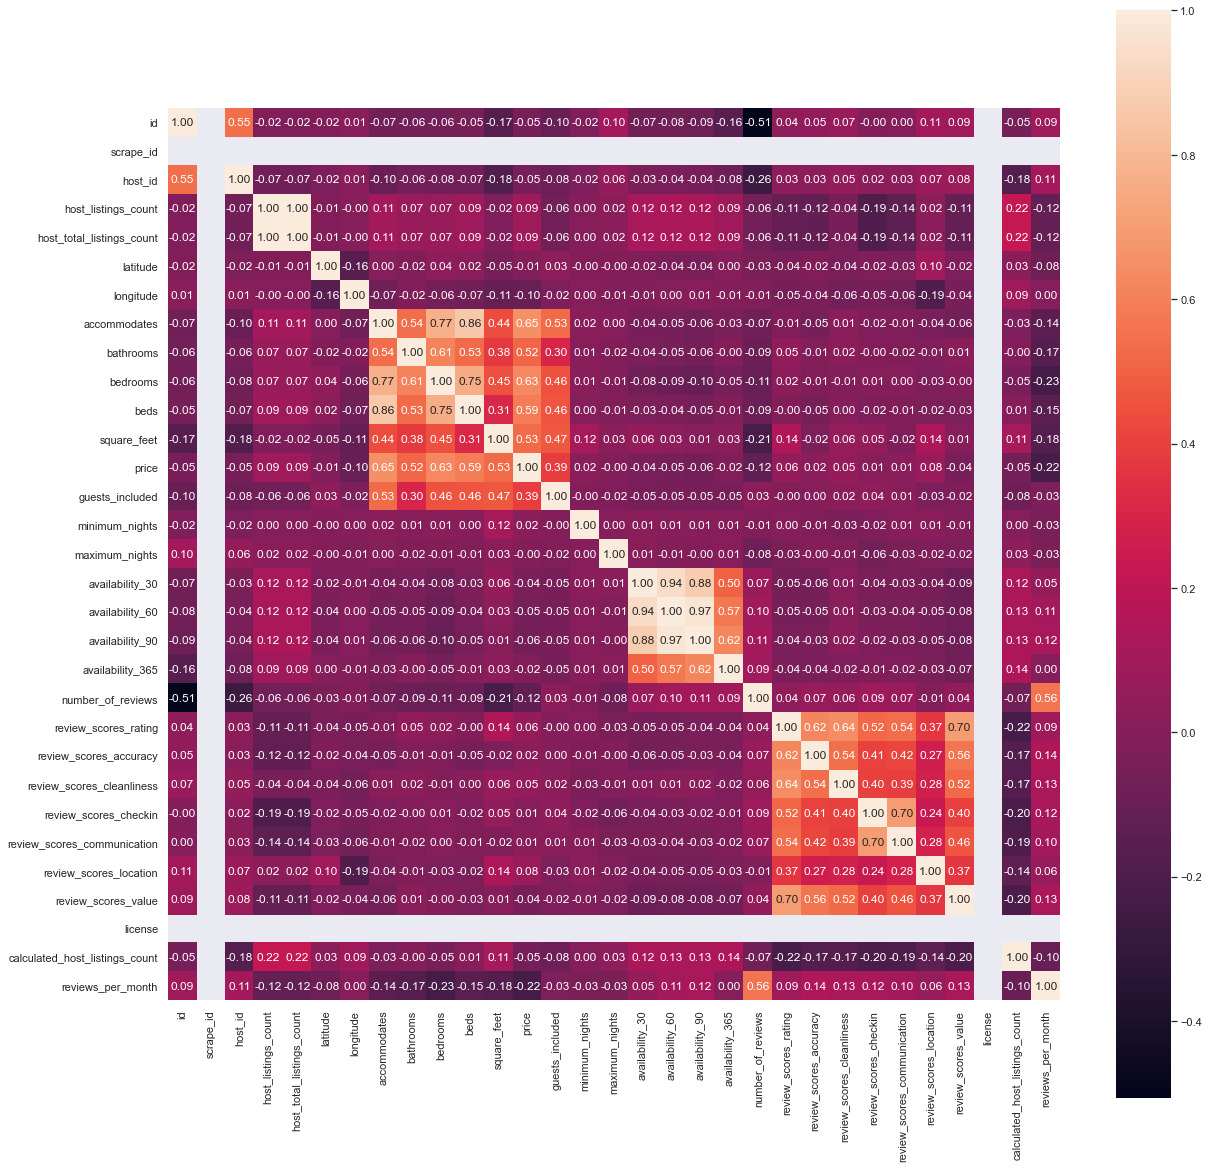

In [80]:
# since we will be predicting "price"  lets try to focus on the corelation matrix for "price"
df_l.corr()['price'] 
hm=sns.heatmap(df_l.corr() , cbar = True, annot=True, square = True, fmt = '.2f')
sns.set(rc={'figure.figsize':(20,20)})
fig = hm.get_figure()

In [81]:
#combining the columns which are correlated, as per the heatmap drawn above

reviews = df_l[['review_scores_rating',
                'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication',
                'review_scores_location', 'review_scores_value']]

rooms = df_l[['room_type', 'accommodates',
               'bathrooms', 'bedrooms', 'beds', 'bed_type']]

hosts = df_l[['host_since', 'host_response_rate', 'host_acceptance_rate', 
               'host_is_superhost','extra_people']]

In [82]:
#calendar dataset to give an overview of the availability and the time when it is available
df_c=pd.read_csv(r"G:codes/udacity/project1/airbnb/calendar.csv")

df_c.info()

df_c['month'] = pd.to_datetime(df_c['date']).dt.month
df_c['year'] = pd.to_datetime(df_c['date']).dt.year

df_c.drop(['date','available'], axis=1, inplace=True)
df_c_new= df_c.copy()
df_c_new.dropna(subset=['price'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Text(0.5, 0, 'Months')

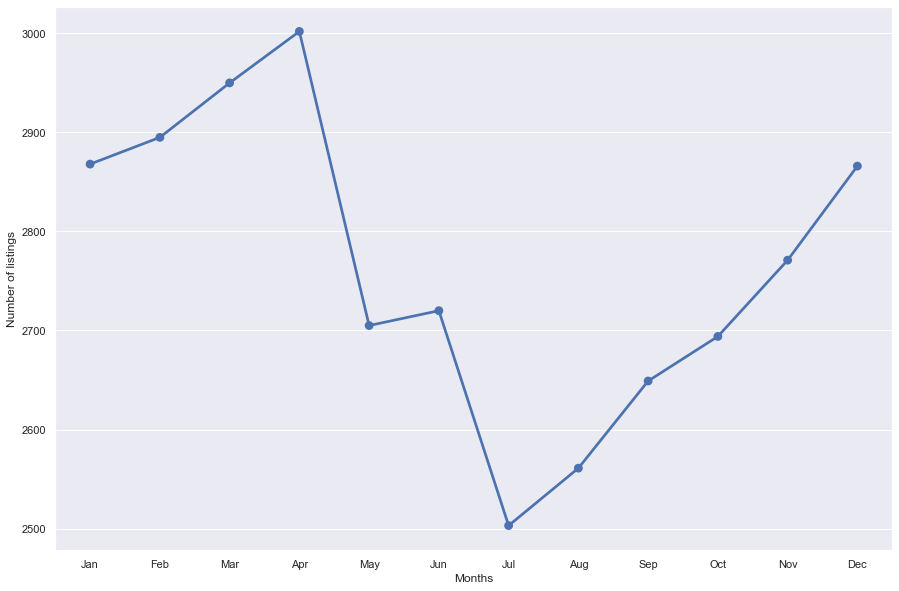

In [83]:
#shows the rise and decline of the number of listings varying with time 
listings_per_month = pd.Series([12])
for i in range(1, 13):
    listings_per_month[i] = len(df_c_new[(df_c_new['month'] == i) & (df_c_new['year'] == 2016)]['listing_id'].unique())
    
listings_per_month = listings_per_month.drop(0)


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
plt.subplots(figsize = (15,10))
ax = sns.pointplot(x = months, y = listings_per_month)
plt.ylabel('Number of listings')
plt.xlabel('Months')
#the number of listings are high in March and are minimum in July and then increases as the year end approaches

In [84]:
df_c_new['price'] = df_c_new['price'].str.replace("[$, ]", "").astype("float")

price_per_month = df_c_new.groupby('month')['price'].mean()


Text(0.5, 0, 'Months')

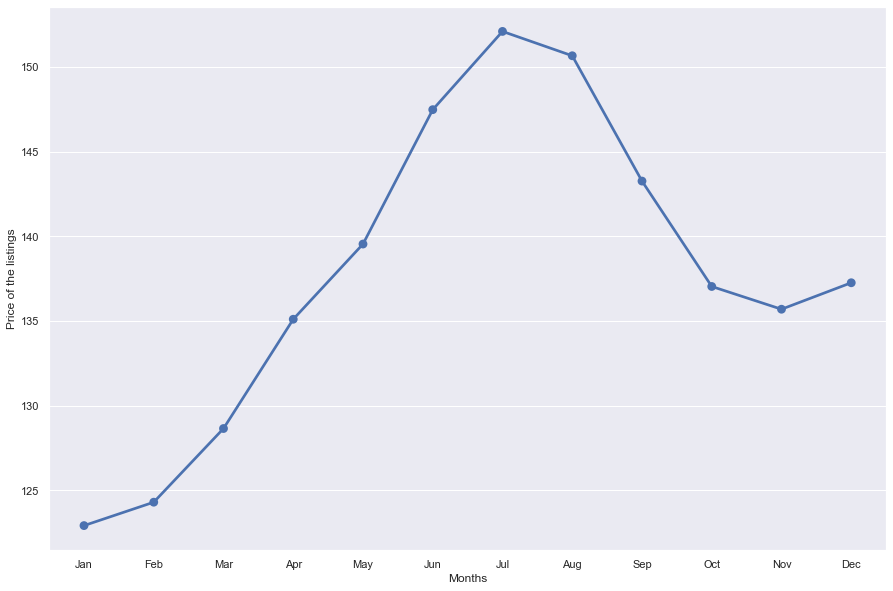

In [85]:
#shows us how the price of the listing varies with what time of the year it is 
plt.subplots(figsize = (15,10))
ax = sns.pointplot(x = months, y = price_per_month)
plt.ylabel('Price of the listings')
plt.xlabel('Months')
#comparing the two graphs we can conclude that when the number of listing is minimum the price of the houses increases

In [86]:
df_l_new= df_l.copy()

#dealing with null values and replacing them with their respective mean and mode 

reviews = ['review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value']
for review in reviews:
    df_l_new[review].fillna(df_l_new[review].mean(),inplace=True) 
    
#------------------------------------------------------------------------------------

room_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
for feature in room_features:
    df_l_new[feature].fillna(df_l_new[feature].mode()[0],inplace=True)

#------------------------------------------------------------------------------------

extra_cols = ['host_since', 'host_is_superhost', 'extra_people']
for col in extra_cols:
    df_l_new[col].fillna(df_l_new[col].mode()[0],inplace=True)
    
df_l_new['host_since'] = pd.to_datetime(df_l_new['host_since']).dt.year

#------------------------------------------------------------------------------------

def get_extra_people_fee(row):
    ''' Return 1 when the is fee for exatra people '''
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0
    
df_l_new['extra_people'] = df_l_new.apply(lambda row: get_extra_people_fee(row),axis=1)


In [87]:
#using dummy values for categorical data of object type
categorical_cols = list(df_l_new.select_dtypes(include=['object']).columns)
for col in  categorical_cols:
    df_l_new = pd.concat([df_l_new.drop(col, axis=1), pd.get_dummies(df_l_new[col], prefix=col, prefix_sep='_',
                            drop_first=True, dummy_na=True)], axis=1)

In [88]:
#out of all the variables available we can shortlist the below mentioned (in X) based on the analysis done earlier

X=df_l_new[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'room_type_Private room', 'room_type_Shared room', 'room_type_nan',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',]]
y = df_l_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
#using mean square error criterion for Random Forest
#I will train Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

RandomForestRegressor(n_jobs=-1, random_state=42)

In [89]:
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

#R2 for test data is 0.465 which tells us that there are many other factors which can be considered while predicting the column "price" 
#R2=(variation explained with the independent variables)/(variation explained without independent variables )
#for a good model  R2 should be maximized
#in this case we can try and include more independent variables which influence the "price" 

Random Forest R^2 train: 0.844, test: 0.465
